# Epsilon Graduation Project

## Used Cars Price Prediction

In [1]:
# after reading and understanding the data and each column meaning
# started with the data preprocessing 

# then the uni variant data analysis
# top region got have resale cars
# most car brand exist in the market for resale
# most brand year cars are in the market
# average odometer cars resale in every region
# cars conditions in the market
# Most common fuel type 
# price distribution 
# top manufacturer car exist
# cars cylinders make difference in petrol usage
# top posting days 
# long and lat diffiens the location
# top country 
# top state

# then the bi variant analysis
# brand cars and thier cylinders
# brand cars and their colors 
# most expensive brand cars
# top cars made muc odometer before resale
# brand cars and thier conditions

# using machine learning algorithms like linear regression, SVM and RandomForestRegressor to predict cars price
# we use the three algorithms and tune thier hyper parameter to reach the maximum accuracy and choose the best algorithm to use it
# use ensemble method with the three algorithms which will tell use the best algorithm and the best accuracy
# using 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer,KNNImputer
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv(r"D:\DataSets\New folder/train-data.csv")
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


# 1. Data cleaning 


### 1.1 Investegation 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
df.duplicated().sum()

0

###  1.2 Working with data issues 

### Dropping duplicated and unused columns 

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.drop(["New_Price","Unnamed: 0"], axis=1, inplace=True)

### Imputing Null values 

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
null_col = ['Mileage', 'Engine' , 'Power','Seats']
imputer = SimpleImputer(strategy='most_frequent')
df[null_col] = imputer.fit_transform(df[null_col])

In [11]:
df = df.convert_dtypes()

### replacing zero values

In [12]:
df['Seats'].replace(to_replace=0 ,value= df['Seats'].mode()[0],inplace=True)

In [13]:
df[df['Power'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5,2.0
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5,1.3
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5,2.1
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5,1.2
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,5,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6,1.7


In [14]:
indx = df[df['Power'] == 'null bhp'].index

In [15]:
df.drop(indx,axis=0,inplace=True)

In [16]:
dirty_cols = ['Mileage', 'Engine', 'Power']

In [17]:
for col in dirty_cols:
    df[col] = df[col].apply(lambda x : float(x.split()[0]))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5912 non-null   string 
 1   Location           5912 non-null   string 
 2   Year               5912 non-null   Int64  
 3   Kilometers_Driven  5912 non-null   Int64  
 4   Fuel_Type          5912 non-null   string 
 5   Transmission       5912 non-null   string 
 6   Owner_Type         5912 non-null   string 
 7   Mileage            5912 non-null   float64
 8   Engine             5912 non-null   float64
 9   Power              5912 non-null   float64
 10  Seats              5912 non-null   Int64  
 11  Price              5912 non-null   Float64
dtypes: Float64(1), Int64(3), float64(3), string(5)
memory usage: 623.5 KB


# 2. Feature Engineering

In [19]:
df["Name"].nunique()

1830

In [20]:
print("Percentage of uniques",round(df["Name"].nunique()/df.shape[0]*100),"%")

Percentage of uniques 31 %


In [21]:
df["Name"]

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 5912, dtype: string

In [22]:
df["Brand"] = df["Name"].apply(lambda x : x.split()[0])

In [23]:
df["Brand"].nunique()

30

In [24]:
df["Name"] = df["Name"].apply(lambda x : " ".join(x.split()[:2]))

In [25]:
df["Name"].nunique()

209

In [26]:
df = df.convert_dtypes()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5912 non-null   string 
 1   Location           5912 non-null   string 
 2   Year               5912 non-null   Int64  
 3   Kilometers_Driven  5912 non-null   Int64  
 4   Fuel_Type          5912 non-null   string 
 5   Transmission       5912 non-null   string 
 6   Owner_Type         5912 non-null   string 
 7   Mileage            5912 non-null   Float64
 8   Engine             5912 non-null   Int64  
 9   Power              5912 non-null   Float64
 10  Seats              5912 non-null   Int64  
 11  Price              5912 non-null   Float64
 12  Brand              5912 non-null   string 
dtypes: Float64(3), Int64(4), string(6)
memory usage: 687.0 KB


In [28]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5912.000000,5.912000e+03,5912.000000,5912.000000,5912.000000,5912.00000,5912.000000
mean,2013.450609,5.837766e+04,18.231778,1622.857070,113.014026,5.28180,9.584919
std,3.188638,9.189848e+04,4.431628,600.877459,53.797403,0.80269,11.233694
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.00000,0.440000
25%,2012.000000,3.351275e+04,15.260000,1198.000000,75.000000,5.00000,3.500000
50%,2014.000000,5.286250e+04,18.200000,1493.000000,94.000000,5.00000,5.700000
75%,2016.000000,7.245375e+04,21.100000,1984.000000,138.100000,5.00000,10.012500
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.00000,160.000000


________________________

# 3. Data understanding 

### 3.1 Univariate analysis 

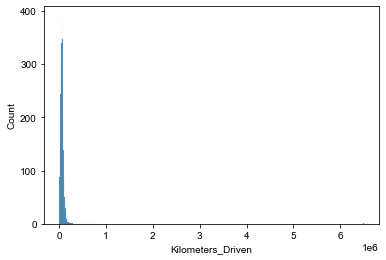

In [29]:
sns.histplot(data = df , x = 'Kilometers_Driven');
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

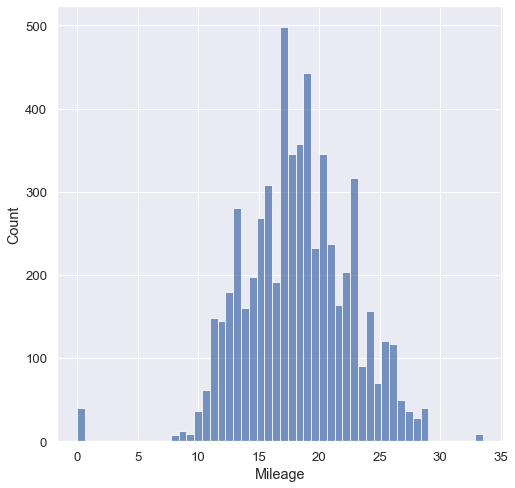

In [30]:
sns.histplot(data = df , x = 'Mileage');

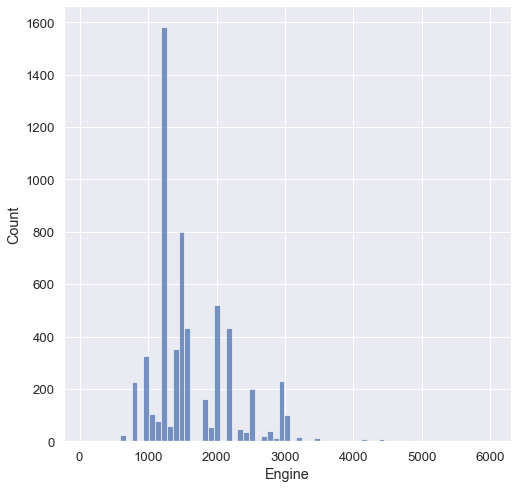

In [31]:
sns.histplot(data = df , x = 'Engine');

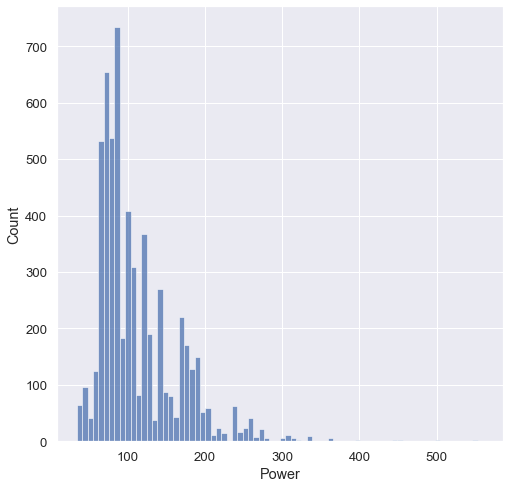

In [32]:
sns.histplot(data = df , x = 'Power');

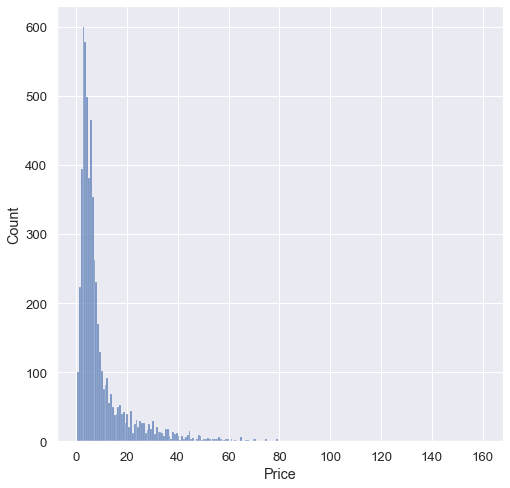

In [33]:
sns.histplot(data = df , x = 'Price');

In [34]:
numerical_cols = ['Kilometers_Driven' , 'Mileage' , 'Engine' , 'Power','Price']

In [35]:
from datasist.structdata import detect_outliers 

In [36]:
df_nums = df.copy()
outliears = detect_outliers(df_nums[numerical_cols],0,df_nums[numerical_cols].columns)
df_nums.drop(outliears,inplace=True)

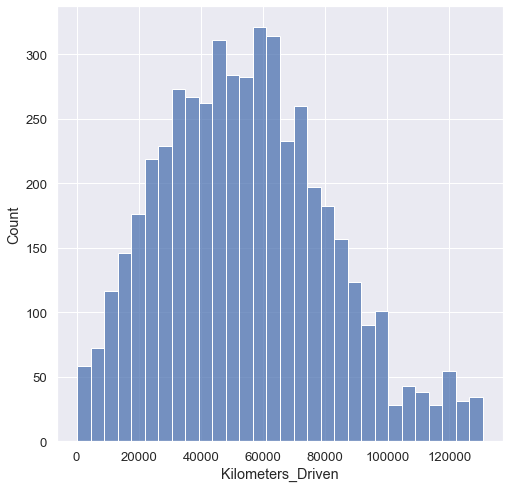

In [37]:
sns.histplot(data = df_nums , x = 'Kilometers_Driven');

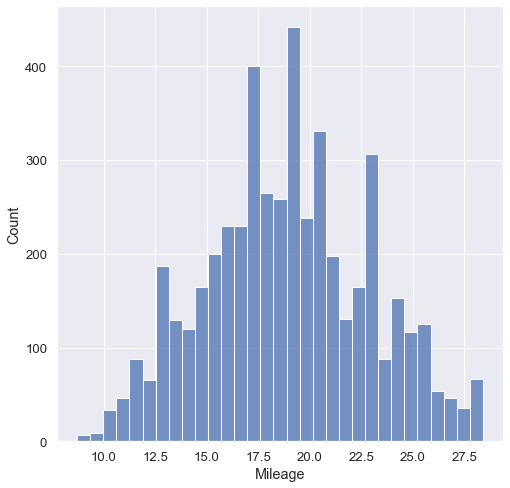

In [38]:
sns.histplot(data = df_nums , x = 'Mileage');

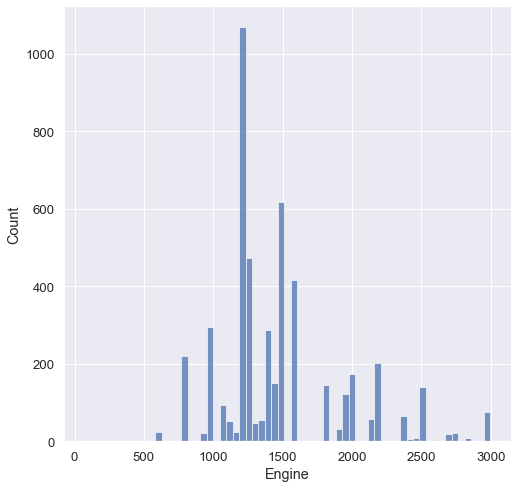

In [39]:
sns.histplot(data = df_nums , x = 'Engine');

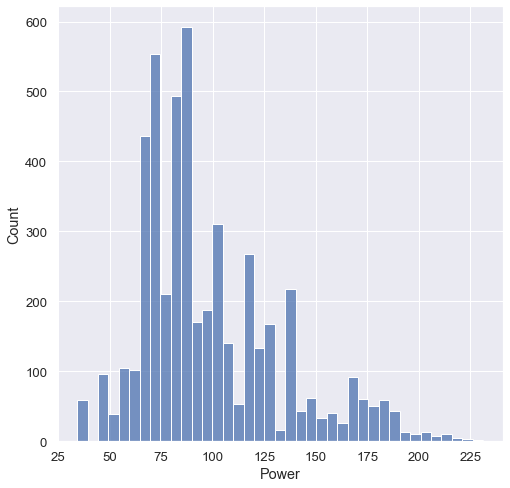

In [40]:
sns.histplot(data = df_nums , x = 'Power');

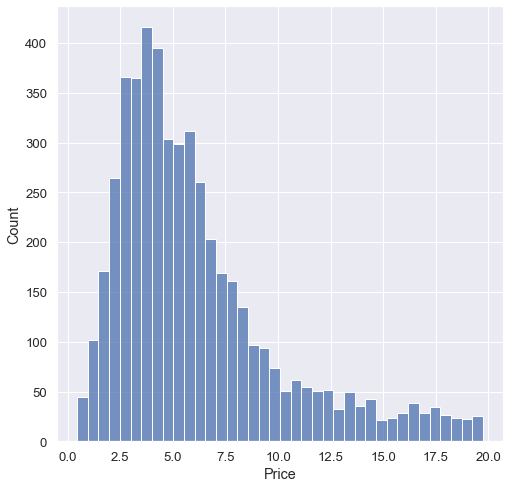

In [41]:
sns.histplot(data = df_nums , x = 'Price');

## 3.2 BiVariant Analysis

<AxesSubplot:xlabel='Brand', ylabel='Price'>

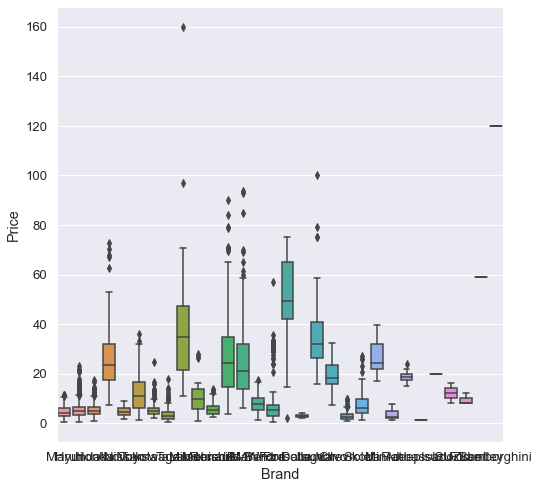

In [42]:
sns.boxplot(data=df, x='Brand', y='Price')

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

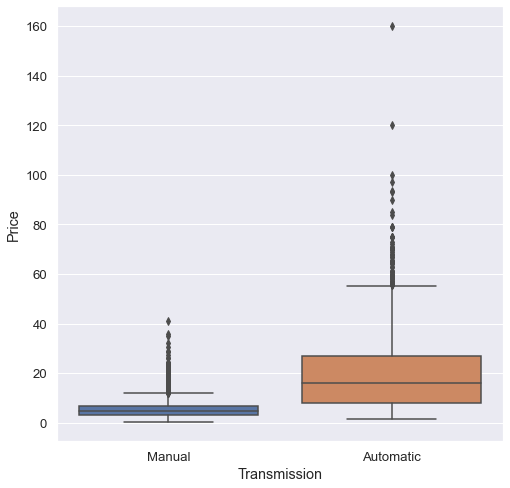

In [43]:
sns.boxplot(data=df, x='Transmission', y='Price')

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

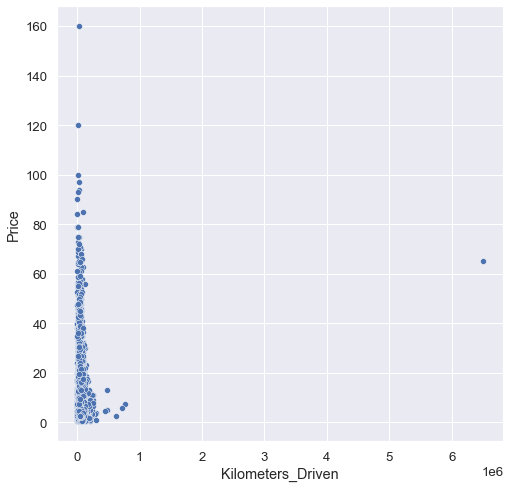

In [44]:
sns.scatterplot(data = df , x = "Kilometers_Driven" , y ="Price")

<AxesSubplot:xlabel='Year', ylabel='Price'>

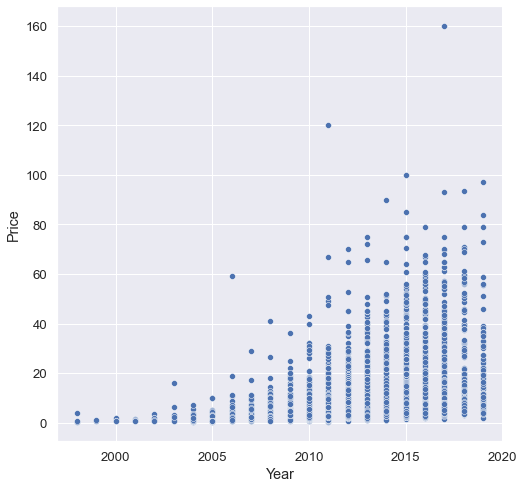

In [45]:
sns.scatterplot(data = df , x ="Year" , y = 'Price' )

<AxesSubplot:>

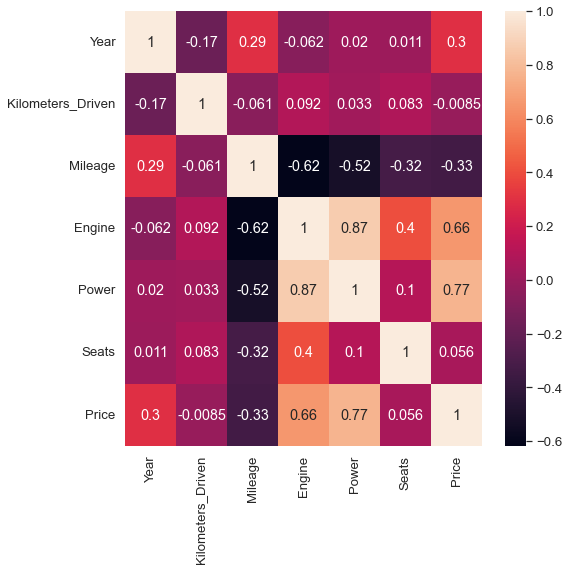

In [46]:
sns.heatmap(df.corr(), annot=True)

In [47]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand'],
      dtype='object')

In [48]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5,1.75,Maruti
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5,12.5,Hyundai
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5,4.5,Honda
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.0,Maruti
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74.0,5,4.75,Maruti
6015,Hyundai Xcent,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71.0,5,4.0,Hyundai
6016,Mahindra Xylo,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112.0,8,2.9,Mahindra
6017,Maruti Wagon,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5,2.65,Maruti


# 4. Data pre-processing

### 4.1 Data transformation 

#### 4.1.1 Catogerical transformation

##### 4.1.1.1 ordinal transformation

In [49]:
transformation = {
    "First":3,
    "Second":2,
    "Third":1,
    "Fourth & Above":0
}

In [50]:
df['Owner_Type'] = df['Owner_Type'].map(transformation)

##### 4.1.1.2 Nominal transformation


In [51]:
Nominal_data = ['Name','Location','Fuel_Type','Transmission','Brand']
binaryencoder = ce.BinaryEncoder(cols=Nominal_data)
df = binaryencoder.fit_transform(df)

In [52]:
Numerical_data = ['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','Price']

#### 4.2.1 Numerical transformation 

In [53]:
new_df = pd.DataFrame(PowerTransformer().fit_transform(df), columns=df.columns, index=df.index)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


### 4.1 Data splitting 

In [54]:
X, y = new_df.drop("Price",axis=1) , new_df["Price"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5.0 Modeling 

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
np.seterr(divide='ignore', invalid='ignore', over='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### 5.1 Linear regression

In [56]:
reg = LinearRegression().fit(X_train,(y_train))
print("R-Squered Trian",round((reg.score(X_train,  (y_train))*100),2),'%')
print("R-Squered Test",round((reg.score(X_test,  (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f"RMSE: {mean_squared_error(y_pred,(y_test))}")

R-Squered Trian 87.81 %
R-Squered Test 88.41 %
RMSE: 0.11025093646673337


### 5.3 Linear regression (Lasso method)

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg.fit(X_train)

PolynomialFeatures()

In [58]:
X_train = poly_reg.transform(X_train)
X_test = poly_reg.transform(X_test)

In [59]:
reg = LassoCV().fit(X_train,(y_train))
print("R-Squered Trian",round((reg.score(X_train,  (y_train))*100),2),'%')
print("R-Squered Test",round((reg.score(X_test,  (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f"RMSE: {mean_squared_error(y_pred,(y_test))}")

R-Squered Trian 94.96 %
R-Squered Test 94.43 %
RMSE: 0.052935648917119674


### 5.4 Linear regression (Ridge method)

In [60]:
reg = RidgeCV().fit(X_train,(y_train))
print("R-Squered Trian",round((reg.score(X_train,  (y_train))*100),2),'%')
print("R-Squered Test",round((reg.score(X_test,  (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f"RMSE: {mean_squared_error(y_pred,(y_test))}")

R-Squered Trian 95.27 %
R-Squered Test 94.21 %
RMSE: 0.055040704602290914


### 5.4 Linear regression (ElasticNetCV method)

In [61]:
reg = ElasticNetCV().fit(X_train,(y_train))
print("R-Squered Trian",round((reg.score(X_train,  (y_train))*100),2),'%')
print("R-Squered Test",round((reg.score(X_test,  (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f"RMSE: {mean_squared_error(y_pred,(y_test))}")

R-Squered Trian 94.98 %
R-Squered Test 94.44 %
RMSE: 0.052891528601156125


## 5.5 Random Forest Regressior and tunning parrameter in it

In [62]:
rf_reg = RandomForestRegressor(n_estimators=120,max_depth=10)
rf_reg.fit(X_train, y_train);
print(rf_reg.score(X_train, y_train))
print(rf_reg.score(X_test, y_test))
print(f"RMSE: {mean_squared_error(y_pred,(y_test))}")

0.9770598787258263
0.9402676040946714
RMSE: 0.052891528601156125


# 6 Ensemble Method with Pipeline

In [64]:
models = list()
models.append(("LR",LinearRegression()))
models.append(("Lasso",LassoCV()))
models.append(("Ridge",RidgeCV()))
models.append(("ElasticNet",ElasticNetCV()))
models.append(("Random Forest",RandomForestRegressor(n_estimators=120,max_depth=10)))

In [65]:
for model in models:
    steps = list()
    #steps.append(("Scaler" , StandardScaler()))
    steps.append(model)
    pipeline = Pipeline(steps = steps)
    scores = cross_validate(pipeline , X , y , cv = 5  , scoring="r2" , return_train_score=True)
    print(model[0])
    print("Train_accuracy", scores["train_score"].mean())
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 25)

LR
Train_accuracy 0.8806059455601251
Test_accuracy 0.8758993765858465
-------------------------
Lasso
Train_accuracy 0.8803402998662359
Test_accuracy 0.8757965567239403
-------------------------
Ridge
Train_accuracy 0.8806012342050064
Test_accuracy 0.875925825965675
-------------------------
ElasticNet
Train_accuracy 0.880346197550808
Test_accuracy 0.8758652524082674
-------------------------
Random Forest
Train_accuracy 0.968562758155227
Test_accuracy 0.9174058082125436
-------------------------


## 7 Grid Search

In [ ]:
params  = [
    { "Model__kernel" : ["Random Forest"] , "max_depth" : range(10,11,12) } ,
    {"Model__kernel" : ["rbf"] , "cv" : [5,6,7]} ,
]

In [56]:
grid = GridSearchCV(estimator = pipeline , param_grid = params , cv = 5  ,return_train_score=True ,  scoring = "accuracy" )

In [ ]:
grid.fit(x,y)

In [ ]:
grid.best_params_

In [ ]:
grid.cv_results_["mean_train_score"].max()

In [ ]:
grid.cv_results_["mean_test_score"].max()

## 8 Deployment

In [67]:
import joblib
import streamlit as st

In [ ]:
joblib.dump(reg , "final_model.h5")
joblib.dump(df.columns,"input_dep.h5")

In [55]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand'],
      dtype='object')

In [68]:
st.title("Know your car price")

inputs = joblib.load("input_dep.h5")
model = joblib.load("model_dep.h5")

def predict(Name, Location, Year, Kilometers_Driven, Fuel_Type,Transmission, Owner_Type, Mileage, Engine, Power, Seats,Brand):
    test_df = pd.DataFrame(columns = inputs)
    test_df.at[0,'Name'] = Name
    test_df.at[0,'Location'] = Location
    test_df.at[0,'Year'] = Year
    test_df.at[0,'Kilometers_Driven'] = Kilometers_Driven
    test_df.at[0,'Fuel_Type'] = Fuel_Type
    test_df.at[0,'Transmission'] = Transmission
    test_df.at[0, 'Owner_Type'] = Owner_Type
    test_df.at[0, 'Mileage'] = Mileage
    test_df.at[0, 'Engine'] = Engine
    test_df.at[0, 'Power'] = Power
    test_df.at[0, 'Seats'] = Seats
    test_df.at[0, 'Brand'] = Brand
    
    print(test_df)
    result = model.predict(test_df)[0]
    return result

def main():
    Name = st.selectbox('Name',('Maruti Wagon','Hyundai Creta', 'Honda Jazz','Maruti Ertiga','Audi A4'
                                ,'Hyundai EON','Nissan Micra','Toyota Innova','Volkswagen Vento','Tata Indica','Ford Fusion',
                                'Mercedes-Benz SL-Class','BMW Z4','Toyota Prius','Force One','Maruti Versa','Honda WR-V',
                                'Bentley Continental',   'Lamborghini Gallardo','Jaguar F'))
    Location = st.selectbox('Location',('Mumbai', 'Hyderabad', 'Kochi', 'Coimbatore', 'Pune', 'Delhi',
       'Kolkata', 'Chennai', 'Jaipur', 'Bangalore', 'Ahmedabad'))
    Year = st.slider("Year" , min_value=1980, max_value=2040, value=2000, step=1)
    Kilometers_Driven = st.slider("Kilometers_Driven" , min_value=1, max_value=999999, value=1, step=100)
    Fuel_Type = st.selectbox("Fuel_Type",('CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'))
    Transmission = st.selectbox("Transmission",('Manual', 'Automatic'))
    Owner_Type = st.selectbox("Owner_Type",('First', 'Second', 'Fourth & Above', 'Third'))
    Mileage =  st.slider("Mileage" , min_value=1, max_value=999999, value=1, step=100)
    Engine = st.slider("Engine" , min_value=0, max_value=6000, value=100, step=100)
    Power = st.slider("Power" , min_value=10, max_value=800, value=10, step=10)
    Seats = st.slider("Seats" , min_value=1, max_value=20, value=1, step=1)
    Brand = st.selectbox("Brand",('Maruti','Hyundai','Honda','Audi',
        'Nissan',        'Toyota',    'Volkswagen',          'Tata',
          'Land',    'Mitsubishi',       'Renault', 'Mercedes-Benz',
           'BMW',      'Mahindra',          'Ford',       'Porsche',
        'Datsun',        'Jaguar',         'Volvo',     'Chevrolet',
         'Skoda',          'Mini',          'Fiat',          'Jeep',
    'Ambassador',         'Isuzu',         'ISUZU',         'Force',
       'Bentley',   'Lamborghini'))

    
    if st.button("test"):
        print(Name, Location, int(Year), int(Kilometers_Driven), Fuel_Type,Transmission, Owner_Type, int(Mileage), int(Engine), int(Power), int(Seats) , Brand)
    if st.button("predict"):
        restult = predict(Name, Location, int(Year), int(Kilometers_Driven), Fuel_Type,Transmission, Owner_Type, int(Mileage), int(Engine), int(Power), int(Seats),Brand)
        
        st.text("The price is {}".format(restult))
if __name__ == '__main__':
    main()

2022-12-09 21:54:57.303 
  command:

    streamlit run C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
